In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [2]:
# Preprocessing

scenario= "helix" #sinus, helix
#n_instance = 1000
n_instance = 1000
n_features = 3
Z = 12 #3的倍數
nodes = 8 #8
scales = ['-1-1','0-1']
scaled = '-1-1'

X_train= x,y (1000, 2)
y_train= z (1000, 1)


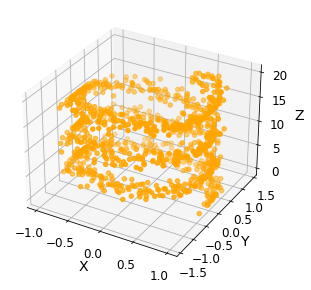

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
#export_excel(X_train, 'Dataset/X_train')
#export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [5]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, nodes, n_features)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          768         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256)          1024        dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 256)          0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [6]:
import AAE_Model

GANorWGAN='WGAN' #GAN
epochs = 5000 #500
batch_size = 100

In [7]:
aae = AAE_Model.AAE(Z, n_features, batch_size, GANorWGAN, nodes)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 256)          768         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 256)          1024        dense_11[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 256)          0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [8]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


### latent variable

## Training

1 [D real: -0.294403, D fake: 0.316755], [Enc/Dec loss: 0.930016, Enc/Dis: 0.934149]
2 [D real: -0.313396, D fake: 0.318533], [Enc/Dec loss: 0.936758, Enc/Dis: 0.941044]
3 [D real: -0.318730, D fake: 0.320203], [Enc/Dec loss: 0.893948, Enc/Dis: 0.898247]
4 [D real: -0.324808, D fake: 0.324730], [Enc/Dec loss: 0.869373, Enc/Dis: 0.873663]
5 [D real: -0.327795, D fake: 0.330191], [Enc/Dec loss: 0.865017, Enc/Dis: 0.869293]
6 [D real: -0.329265, D fake: 0.332094], [Enc/Dec loss: 0.846392, Enc/Dis: 0.850639]
7 [D real: -0.331797, D fake: 0.334596], [Enc/Dec loss: 0.831029, Enc/Dis: 0.835257]
8 [D real: -0.333102, D fake: 0.336114], [Enc/Dec loss: 0.796681, Enc/Dis: 0.800896]
9 [D real: -0.332292, D fake: 0.336384], [Enc/Dec loss: 0.786058, Enc/Dis: 0.790281]
10 [D real: -0.333313, D fake: 0.338524], [Enc/Dec loss: 0.768580, Enc/Dis: 0.772784]
11 [D real: -0.347110, D fake: 0.348250], [Enc/Dec loss: 0.620348, Enc/Dis: 0.624486]
12 [D real: -0.350509, D fake: 0.353507], [Enc/Dec loss: 0.6104

94 [D real: -0.350961, D fake: 0.354896], [Enc/Dec loss: 0.141534, Enc/Dis: 0.145160]
95 [D real: -0.353134, D fake: 0.357101], [Enc/Dec loss: 0.136474, Enc/Dis: 0.140080]
96 [D real: -0.349952, D fake: 0.356820], [Enc/Dec loss: 0.132279, Enc/Dis: 0.135917]
97 [D real: -0.352617, D fake: 0.356868], [Enc/Dec loss: 0.132198, Enc/Dis: 0.135839]
98 [D real: -0.350693, D fake: 0.354568], [Enc/Dec loss: 0.133314, Enc/Dis: 0.136949]
99 [D real: -0.349930, D fake: 0.353041], [Enc/Dec loss: 0.131762, Enc/Dis: 0.135408]
100 [D real: -0.349145, D fake: 0.352487], [Enc/Dec loss: 0.132983, Enc/Dis: 0.136648]
101 [D real: -0.359806, D fake: 0.354132], [Enc/Dec loss: 0.134300, Enc/Dis: 0.138043]
102 [D real: -0.357945, D fake: 0.353070], [Enc/Dec loss: 0.145454, Enc/Dis: 0.149088]
103 [D real: -0.358003, D fake: 0.357119], [Enc/Dec loss: 0.144474, Enc/Dis: 0.148103]
104 [D real: -0.361750, D fake: 0.358194], [Enc/Dec loss: 0.141791, Enc/Dis: 0.145419]
105 [D real: -0.359787, D fake: 0.357551], [Enc/D

189 [D real: -0.382653, D fake: 0.372549], [Enc/Dec loss: 0.094282, Enc/Dis: 0.097739]
190 [D real: -0.385579, D fake: 0.372611], [Enc/Dec loss: 0.094382, Enc/Dis: 0.097822]
191 [D real: -0.375458, D fake: 0.380253], [Enc/Dec loss: 0.084726, Enc/Dis: 0.088212]
192 [D real: -0.386607, D fake: 0.379547], [Enc/Dec loss: 0.091764, Enc/Dis: 0.095268]
193 [D real: -0.388284, D fake: 0.381748], [Enc/Dec loss: 0.092896, Enc/Dis: 0.096339]
194 [D real: -0.384625, D fake: 0.385556], [Enc/Dec loss: 0.089130, Enc/Dis: 0.092535]
195 [D real: -0.386940, D fake: 0.384280], [Enc/Dec loss: 0.089385, Enc/Dis: 0.092781]
196 [D real: -0.389652, D fake: 0.377871], [Enc/Dec loss: 0.089115, Enc/Dis: 0.092484]
197 [D real: -0.390331, D fake: 0.375194], [Enc/Dec loss: 0.089286, Enc/Dis: 0.092655]
198 [D real: -0.388460, D fake: 0.375714], [Enc/Dec loss: 0.090379, Enc/Dis: 0.093731]
199 [D real: -0.388140, D fake: 0.376606], [Enc/Dec loss: 0.089318, Enc/Dis: 0.092667]
200 [D real: -0.389685, D fake: 0.380701], 

284 [D real: -0.593671, D fake: 0.395146], [Enc/Dec loss: 0.083465, Enc/Dis: 0.086821]
285 [D real: -0.588072, D fake: 0.386217], [Enc/Dec loss: 0.081438, Enc/Dis: 0.084735]
286 [D real: -0.592975, D fake: 0.389727], [Enc/Dec loss: 0.083861, Enc/Dis: 0.087173]
287 [D real: -0.590907, D fake: 0.389966], [Enc/Dec loss: 0.084286, Enc/Dis: 0.087637]
288 [D real: -0.589413, D fake: 0.391785], [Enc/Dec loss: 0.085829, Enc/Dis: 0.089153]
289 [D real: -0.592454, D fake: 0.392094], [Enc/Dec loss: 0.087724, Enc/Dis: 0.091037]
290 [D real: -0.591599, D fake: 0.390802], [Enc/Dec loss: 0.088984, Enc/Dis: 0.092278]
291 [D real: -0.615774, D fake: 0.398339], [Enc/Dec loss: 0.074996, Enc/Dis: 0.078022]
292 [D real: -0.630859, D fake: 0.409778], [Enc/Dec loss: 0.091900, Enc/Dis: 0.095099]
293 [D real: -0.602617, D fake: 0.404883], [Enc/Dec loss: 0.090235, Enc/Dis: 0.093448]
294 [D real: -0.616026, D fake: 0.396873], [Enc/Dec loss: 0.084634, Enc/Dis: 0.087807]
295 [D real: -0.622638, D fake: 0.383280], 

379 [D real: -0.759471, D fake: 0.262252], [Enc/Dec loss: 0.072658, Enc/Dis: 0.075052]
380 [D real: -0.758143, D fake: 0.268515], [Enc/Dec loss: 0.074052, Enc/Dis: 0.076415]
381 [D real: -0.785381, D fake: 0.271203], [Enc/Dec loss: 0.076232, Enc/Dis: 0.078740]
382 [D real: -0.783772, D fake: 0.220299], [Enc/Dec loss: 0.072482, Enc/Dis: 0.074683]
383 [D real: -0.777611, D fake: 0.219857], [Enc/Dec loss: 0.075902, Enc/Dis: 0.078118]
384 [D real: -0.770254, D fake: 0.220936], [Enc/Dec loss: 0.075206, Enc/Dis: 0.077342]
385 [D real: -0.779692, D fake: 0.223935], [Enc/Dec loss: 0.077348, Enc/Dis: 0.079602]
386 [D real: -0.780206, D fake: 0.221753], [Enc/Dec loss: 0.077858, Enc/Dis: 0.080117]
387 [D real: -0.778507, D fake: 0.230533], [Enc/Dec loss: 0.079475, Enc/Dis: 0.081715]
388 [D real: -0.773747, D fake: 0.233834], [Enc/Dec loss: 0.080003, Enc/Dis: 0.082205]
389 [D real: -0.778165, D fake: 0.234351], [Enc/Dec loss: 0.080814, Enc/Dis: 0.083025]
390 [D real: -0.773262, D fake: 0.236326], 

474 [D real: -0.894924, D fake: 0.136340], [Enc/Dec loss: 0.072481, Enc/Dis: 0.073704]
475 [D real: -0.899399, D fake: 0.124867], [Enc/Dec loss: 0.073708, Enc/Dis: 0.074919]
476 [D real: -0.894381, D fake: 0.122068], [Enc/Dec loss: 0.075958, Enc/Dis: 0.077085]
477 [D real: -0.898837, D fake: 0.121342], [Enc/Dec loss: 0.075365, Enc/Dis: 0.076527]
478 [D real: -0.901924, D fake: 0.115659], [Enc/Dec loss: 0.075640, Enc/Dis: 0.076817]
479 [D real: -0.896622, D fake: 0.118009], [Enc/Dec loss: 0.075057, Enc/Dis: 0.076246]
480 [D real: -0.897705, D fake: 0.124444], [Enc/Dec loss: 0.074882, Enc/Dis: 0.076052]
481 [D real: -0.909395, D fake: 0.072084], [Enc/Dec loss: 0.071833, Enc/Dis: 0.073138]
482 [D real: -0.919715, D fake: 0.089796], [Enc/Dec loss: 0.068338, Enc/Dis: 0.069592]
483 [D real: -0.905847, D fake: 0.084946], [Enc/Dec loss: 0.070657, Enc/Dis: 0.071812]
484 [D real: -0.898106, D fake: 0.096165], [Enc/Dec loss: 0.071402, Enc/Dis: 0.072458]
485 [D real: -0.905268, D fake: 0.109728], 

569 [D real: -0.950472, D fake: 0.048636], [Enc/Dec loss: 0.075019, Enc/Dis: 0.075599]
570 [D real: -0.951447, D fake: 0.048845], [Enc/Dec loss: 0.074063, Enc/Dis: 0.074688]
571 [D real: -0.981919, D fake: 0.047190], [Enc/Dec loss: 0.084621, Enc/Dis: 0.085009]
572 [D real: -0.966735, D fake: 0.075493], [Enc/Dec loss: 0.083725, Enc/Dis: 0.084083]
573 [D real: -0.944179, D fake: 0.061712], [Enc/Dec loss: 0.078918, Enc/Dis: 0.079274]
574 [D real: -0.945351, D fake: 0.059999], [Enc/Dec loss: 0.078361, Enc/Dis: 0.078765]
575 [D real: -0.949925, D fake: 0.054744], [Enc/Dec loss: 0.081606, Enc/Dis: 0.082037]
576 [D real: -0.953899, D fake: 0.054936], [Enc/Dec loss: 0.080679, Enc/Dis: 0.081143]
577 [D real: -0.954228, D fake: 0.051617], [Enc/Dec loss: 0.079392, Enc/Dis: 0.079879]
578 [D real: -0.950449, D fake: 0.049419], [Enc/Dec loss: 0.079028, Enc/Dis: 0.079507]
579 [D real: -0.952265, D fake: 0.047920], [Enc/Dec loss: 0.078887, Enc/Dis: 0.079425]
580 [D real: -0.952345, D fake: 0.051265], 

664 [D real: -0.969998, D fake: 0.018120], [Enc/Dec loss: 0.072192, Enc/Dis: 0.072372]
665 [D real: -0.967266, D fake: 0.017597], [Enc/Dec loss: 0.069928, Enc/Dis: 0.070121]
666 [D real: -0.971521, D fake: 0.017841], [Enc/Dec loss: 0.069487, Enc/Dis: 0.069680]
667 [D real: -0.972519, D fake: 0.017136], [Enc/Dec loss: 0.068792, Enc/Dis: 0.068987]
668 [D real: -0.974073, D fake: 0.019339], [Enc/Dec loss: 0.071432, Enc/Dis: 0.071674]
669 [D real: -0.973927, D fake: 0.020887], [Enc/Dec loss: 0.072772, Enc/Dis: 0.073025]
670 [D real: -0.975784, D fake: 0.019855], [Enc/Dec loss: 0.072041, Enc/Dis: 0.072306]
671 [D real: -0.989581, D fake: 0.021975], [Enc/Dec loss: 0.073604, Enc/Dis: 0.074068]
672 [D real: -0.986270, D fake: 0.016269], [Enc/Dec loss: 0.079310, Enc/Dis: 0.079691]
673 [D real: -0.988220, D fake: 0.017084], [Enc/Dec loss: 0.083077, Enc/Dis: 0.083409]
674 [D real: -0.979434, D fake: 0.014476], [Enc/Dec loss: 0.076910, Enc/Dis: 0.077232]
675 [D real: -0.978400, D fake: 0.015883], 

759 [D real: -0.980627, D fake: 0.011796], [Enc/Dec loss: 0.070437, Enc/Dis: 0.070648]
760 [D real: -0.981228, D fake: 0.014179], [Enc/Dec loss: 0.069229, Enc/Dis: 0.069441]
761 [D real: -0.981680, D fake: 0.017188], [Enc/Dec loss: 0.076956, Enc/Dis: 0.077136]
762 [D real: -0.984899, D fake: 0.015707], [Enc/Dec loss: 0.069102, Enc/Dis: 0.069243]
763 [D real: -0.985019, D fake: 0.012201], [Enc/Dec loss: 0.070153, Enc/Dis: 0.070378]
764 [D real: -0.988209, D fake: 0.015015], [Enc/Dec loss: 0.068998, Enc/Dis: 0.069209]
765 [D real: -0.986715, D fake: 0.012591], [Enc/Dec loss: 0.068010, Enc/Dis: 0.068241]
766 [D real: -0.986359, D fake: 0.011806], [Enc/Dec loss: 0.069434, Enc/Dis: 0.069690]
767 [D real: -0.986553, D fake: 0.021087], [Enc/Dec loss: 0.066992, Enc/Dis: 0.067232]
768 [D real: -0.984567, D fake: 0.023685], [Enc/Dec loss: 0.068553, Enc/Dis: 0.068784]
769 [D real: -0.985516, D fake: 0.021517], [Enc/Dec loss: 0.069306, Enc/Dis: 0.069523]
770 [D real: -0.986562, D fake: 0.020414], 

854 [D real: -0.985015, D fake: 0.004124], [Enc/Dec loss: 0.069863, Enc/Dis: 0.070034]
855 [D real: -0.985646, D fake: 0.004656], [Enc/Dec loss: 0.071538, Enc/Dis: 0.071702]
856 [D real: -0.987486, D fake: 0.006421], [Enc/Dec loss: 0.069485, Enc/Dis: 0.069673]
857 [D real: -0.988411, D fake: 0.007004], [Enc/Dec loss: 0.069565, Enc/Dis: 0.069767]
858 [D real: -0.989449, D fake: 0.007407], [Enc/Dec loss: 0.069863, Enc/Dis: 0.070063]
859 [D real: -0.990199, D fake: 0.006835], [Enc/Dec loss: 0.069572, Enc/Dis: 0.069764]
860 [D real: -0.989702, D fake: 0.007616], [Enc/Dec loss: 0.070904, Enc/Dis: 0.071098]
861 [D real: -0.994413, D fake: 0.003926], [Enc/Dec loss: 0.081307, Enc/Dis: 0.081428]
862 [D real: -0.989691, D fake: 0.005984], [Enc/Dec loss: 0.086694, Enc/Dis: 0.086834]
863 [D real: -0.991421, D fake: 0.004625], [Enc/Dec loss: 0.081502, Enc/Dis: 0.081643]
864 [D real: -0.983664, D fake: 0.004633], [Enc/Dec loss: 0.077952, Enc/Dis: 0.078085]
865 [D real: -0.986459, D fake: 0.008288], 

949 [D real: -0.996145, D fake: 0.007243], [Enc/Dec loss: 0.071685, Enc/Dis: 0.071809]
950 [D real: -0.996033, D fake: 0.007063], [Enc/Dec loss: 0.070208, Enc/Dis: 0.070333]
951 [D real: -0.999095, D fake: 0.006894], [Enc/Dec loss: 0.065393, Enc/Dis: 0.065476]
952 [D real: -0.997735, D fake: 0.005171], [Enc/Dec loss: 0.066796, Enc/Dis: 0.066880]
953 [D real: -0.995716, D fake: 0.004032], [Enc/Dec loss: 0.072972, Enc/Dis: 0.073060]
954 [D real: -0.993769, D fake: 0.006232], [Enc/Dec loss: 0.069773, Enc/Dis: 0.069859]
955 [D real: -0.990698, D fake: 0.005259], [Enc/Dec loss: 0.074017, Enc/Dis: 0.074111]
956 [D real: -0.991922, D fake: 0.009012], [Enc/Dec loss: 0.071671, Enc/Dis: 0.071762]
957 [D real: -0.992258, D fake: 0.009036], [Enc/Dec loss: 0.074606, Enc/Dis: 0.074702]
958 [D real: -0.992778, D fake: 0.008184], [Enc/Dec loss: 0.074387, Enc/Dis: 0.074484]
959 [D real: -0.993336, D fake: 0.007666], [Enc/Dec loss: 0.073340, Enc/Dis: 0.073456]
960 [D real: -0.993334, D fake: 0.007029], 

1043 [D real: -0.995226, D fake: 0.001335], [Enc/Dec loss: 0.069856, Enc/Dis: 0.069977]
1044 [D real: -0.996363, D fake: 0.002463], [Enc/Dec loss: 0.071009, Enc/Dis: 0.071135]
1045 [D real: -0.996553, D fake: 0.004700], [Enc/Dec loss: 0.070140, Enc/Dis: 0.070292]
1046 [D real: -0.997033, D fake: 0.021873], [Enc/Dec loss: 0.071287, Enc/Dis: 0.071433]
1047 [D real: -0.997172, D fake: 0.019202], [Enc/Dec loss: 0.071209, Enc/Dis: 0.071345]
1048 [D real: -0.995220, D fake: 0.017257], [Enc/Dec loss: 0.070953, Enc/Dis: 0.071081]
1049 [D real: -0.991649, D fake: 0.015365], [Enc/Dec loss: 0.069512, Enc/Dis: 0.069633]
1050 [D real: -0.991013, D fake: 0.013943], [Enc/Dec loss: 0.068664, Enc/Dis: 0.068780]
1051 [D real: -0.976845, D fake: 0.002900], [Enc/Dec loss: 0.075208, Enc/Dis: 0.075291]
1052 [D real: -0.987365, D fake: 0.002315], [Enc/Dec loss: 0.070858, Enc/Dis: 0.070940]
1053 [D real: -0.990589, D fake: 0.001919], [Enc/Dec loss: 0.068660, Enc/Dis: 0.068745]
1054 [D real: -0.990437, D fake:

1137 [D real: -0.996517, D fake: 0.002554], [Enc/Dec loss: 0.066406, Enc/Dis: 0.066496]
1138 [D real: -0.996909, D fake: 0.002404], [Enc/Dec loss: 0.066387, Enc/Dis: 0.066475]
1139 [D real: -0.996935, D fake: 0.002197], [Enc/Dec loss: 0.067707, Enc/Dis: 0.067795]
1140 [D real: -0.997193, D fake: 0.002005], [Enc/Dec loss: 0.068664, Enc/Dis: 0.068751]
1141 [D real: -0.999339, D fake: 0.076121], [Enc/Dec loss: 0.095373, Enc/Dis: 0.095485]
1142 [D real: -0.998346, D fake: 0.038283], [Enc/Dec loss: 0.081630, Enc/Dis: 0.081723]
1143 [D real: -0.997815, D fake: 0.025655], [Enc/Dec loss: 0.076330, Enc/Dis: 0.076416]
1144 [D real: -0.991970, D fake: 0.019803], [Enc/Dec loss: 0.072843, Enc/Dis: 0.072927]
1145 [D real: -0.949328, D fake: 0.015970], [Enc/Dec loss: 0.069849, Enc/Dis: 0.069931]
1146 [D real: -0.956997, D fake: 0.014303], [Enc/Dec loss: 0.066710, Enc/Dis: 0.066790]
1147 [D real: -0.963040, D fake: 0.013388], [Enc/Dec loss: 0.068190, Enc/Dis: 0.068387]
1148 [D real: -0.967638, D fake:

1231 [D real: -0.993802, D fake: 0.000500], [Enc/Dec loss: 0.062738, Enc/Dis: 0.062819]
1232 [D real: -0.996518, D fake: 0.000468], [Enc/Dec loss: 0.067934, Enc/Dis: 0.068060]
1233 [D real: -0.997577, D fake: 0.000809], [Enc/Dec loss: 0.069591, Enc/Dis: 0.069707]
1234 [D real: -0.998025, D fake: 0.000698], [Enc/Dec loss: 0.068783, Enc/Dis: 0.068895]
1235 [D real: -0.996874, D fake: 0.000747], [Enc/Dec loss: 0.069895, Enc/Dis: 0.070008]
1236 [D real: -0.997316, D fake: 0.003322], [Enc/Dec loss: 0.068608, Enc/Dis: 0.068735]
1237 [D real: -0.997672, D fake: 0.002958], [Enc/Dec loss: 0.070870, Enc/Dis: 0.071005]
1238 [D real: -0.997772, D fake: 0.002818], [Enc/Dec loss: 0.072666, Enc/Dis: 0.072796]
1239 [D real: -0.998013, D fake: 0.002771], [Enc/Dec loss: 0.071358, Enc/Dis: 0.071507]
1240 [D real: -0.998089, D fake: 0.002692], [Enc/Dec loss: 0.071431, Enc/Dis: 0.071579]
1241 [D real: -0.999377, D fake: 0.003490], [Enc/Dec loss: 0.071532, Enc/Dis: 0.071612]
1242 [D real: -0.998392, D fake:

1325 [D real: -0.997656, D fake: 0.000750], [Enc/Dec loss: 0.078514, Enc/Dis: 0.078608]
1326 [D real: -0.997826, D fake: 0.001037], [Enc/Dec loss: 0.077280, Enc/Dis: 0.077372]
1327 [D real: -0.998111, D fake: 0.001056], [Enc/Dec loss: 0.077066, Enc/Dis: 0.077158]
1328 [D real: -0.998047, D fake: 0.000988], [Enc/Dec loss: 0.077681, Enc/Dis: 0.077777]
1329 [D real: -0.998029, D fake: 0.003274], [Enc/Dec loss: 0.076116, Enc/Dis: 0.076218]
1330 [D real: -0.998198, D fake: 0.003145], [Enc/Dec loss: 0.075206, Enc/Dis: 0.075304]
1331 [D real: -0.996225, D fake: 0.000569], [Enc/Dec loss: 0.061971, Enc/Dis: 0.062036]
1332 [D real: -0.952405, D fake: 0.000833], [Enc/Dec loss: 0.067008, Enc/Dis: 0.067091]
1333 [D real: -0.967142, D fake: 0.001236], [Enc/Dec loss: 0.067561, Enc/Dis: 0.067658]
1334 [D real: -0.975237, D fake: 0.013253], [Enc/Dec loss: 0.067828, Enc/Dis: 0.067936]
1335 [D real: -0.980110, D fake: 0.016089], [Enc/Dec loss: 0.067920, Enc/Dis: 0.068024]
1336 [D real: -0.982902, D fake:

1419 [D real: -0.996565, D fake: 0.001456], [Enc/Dec loss: 0.066290, Enc/Dis: 0.066380]
1420 [D real: -0.996907, D fake: 0.001334], [Enc/Dec loss: 0.065620, Enc/Dis: 0.065713]
1421 [D real: -0.999961, D fake: 0.025554], [Enc/Dec loss: 0.061875, Enc/Dis: 0.061976]
1422 [D real: -0.999782, D fake: 0.015339], [Enc/Dec loss: 0.062273, Enc/Dis: 0.062422]
1423 [D real: -0.999782, D fake: 0.010403], [Enc/Dec loss: 0.063223, Enc/Dis: 0.063345]
1424 [D real: -0.999753, D fake: 0.007916], [Enc/Dec loss: 0.063937, Enc/Dis: 0.064045]
1425 [D real: -0.999481, D fake: 0.006388], [Enc/Dec loss: 0.065241, Enc/Dis: 0.065342]
1426 [D real: -0.999490, D fake: 0.005374], [Enc/Dec loss: 0.065502, Enc/Dis: 0.065598]
1427 [D real: -0.998327, D fake: 0.004734], [Enc/Dec loss: 0.066698, Enc/Dis: 0.066792]
1428 [D real: -0.998241, D fake: 0.004192], [Enc/Dec loss: 0.066299, Enc/Dis: 0.066390]
1429 [D real: -0.996929, D fake: 0.003771], [Enc/Dec loss: 0.066280, Enc/Dis: 0.066370]
1430 [D real: -0.997230, D fake:

1513 [D real: -0.990923, D fake: 0.001051], [Enc/Dec loss: 0.066708, Enc/Dis: 0.066832]
1514 [D real: -0.993167, D fake: 0.001187], [Enc/Dec loss: 0.066314, Enc/Dis: 0.066440]
1515 [D real: -0.994515, D fake: 0.002214], [Enc/Dec loss: 0.064300, Enc/Dis: 0.064416]
1516 [D real: -0.995415, D fake: 0.009969], [Enc/Dec loss: 0.063663, Enc/Dis: 0.063797]
1517 [D real: -0.996037, D fake: 0.008866], [Enc/Dec loss: 0.062950, Enc/Dis: 0.063074]
1518 [D real: -0.996500, D fake: 0.008912], [Enc/Dec loss: 0.062481, Enc/Dis: 0.062603]
1519 [D real: -0.996745, D fake: 0.008018], [Enc/Dec loss: 0.063890, Enc/Dis: 0.064006]
1520 [D real: -0.996964, D fake: 0.007234], [Enc/Dec loss: 0.064212, Enc/Dis: 0.064324]
1521 [D real: -0.937993, D fake: 0.000601], [Enc/Dec loss: 0.069569, Enc/Dis: 0.069648]
1522 [D real: -0.964989, D fake: 0.000465], [Enc/Dec loss: 0.065974, Enc/Dis: 0.066053]
1523 [D real: -0.974947, D fake: 0.000621], [Enc/Dec loss: 0.066152, Enc/Dis: 0.066228]
1524 [D real: -0.978856, D fake:

1607 [D real: -0.994030, D fake: 0.000382], [Enc/Dec loss: 0.056460, Enc/Dis: 0.056532]
1608 [D real: -0.994769, D fake: 0.001901], [Enc/Dec loss: 0.058928, Enc/Dis: 0.059000]
1609 [D real: -0.995338, D fake: 0.001998], [Enc/Dec loss: 0.060351, Enc/Dis: 0.060430]
1610 [D real: -0.995682, D fake: 0.002112], [Enc/Dec loss: 0.061828, Enc/Dis: 0.061908]
1611 [D real: -0.999809, D fake: 0.001090], [Enc/Dec loss: 0.079956, Enc/Dis: 0.080041]
1612 [D real: -0.999704, D fake: 0.000643], [Enc/Dec loss: 0.077755, Enc/Dis: 0.077836]
1613 [D real: -0.999234, D fake: 0.000864], [Enc/Dec loss: 0.069155, Enc/Dis: 0.069228]
1614 [D real: -0.999284, D fake: 0.000720], [Enc/Dec loss: 0.069347, Enc/Dis: 0.069428]
1615 [D real: -0.999336, D fake: 0.001683], [Enc/Dec loss: 0.070337, Enc/Dis: 0.070418]
1616 [D real: -0.998743, D fake: 0.001431], [Enc/Dec loss: 0.070537, Enc/Dis: 0.070617]
1617 [D real: -0.998887, D fake: 0.001246], [Enc/Dec loss: 0.072163, Enc/Dis: 0.072247]
1618 [D real: -0.999014, D fake:

1701 [D real: -0.996557, D fake: 0.000028], [Enc/Dec loss: 0.074353, Enc/Dis: 0.074430]
1702 [D real: -0.997663, D fake: 0.000070], [Enc/Dec loss: 0.075170, Enc/Dis: 0.075250]
1703 [D real: -0.998128, D fake: 0.000155], [Enc/Dec loss: 0.071757, Enc/Dis: 0.071832]
1704 [D real: -0.997536, D fake: 0.000398], [Enc/Dec loss: 0.073062, Enc/Dis: 0.073140]
1705 [D real: -0.997214, D fake: 0.000376], [Enc/Dec loss: 0.072763, Enc/Dis: 0.072841]
1706 [D real: -0.997210, D fake: 0.000569], [Enc/Dec loss: 0.070701, Enc/Dis: 0.070777]
1707 [D real: -0.997282, D fake: 0.001042], [Enc/Dec loss: 0.068240, Enc/Dis: 0.068314]
1708 [D real: -0.997620, D fake: 0.001885], [Enc/Dec loss: 0.066599, Enc/Dis: 0.066672]
1709 [D real: -0.997871, D fake: 0.001712], [Enc/Dec loss: 0.067478, Enc/Dis: 0.067551]
1710 [D real: -0.998081, D fake: 0.001564], [Enc/Dec loss: 0.067412, Enc/Dis: 0.067485]
1711 [D real: -0.999356, D fake: 0.000153], [Enc/Dec loss: 0.051319, Enc/Dis: 0.051410]
1712 [D real: -0.999659, D fake:

1795 [D real: -0.999445, D fake: 0.000403], [Enc/Dec loss: 0.062033, Enc/Dis: 0.062100]
1796 [D real: -0.999521, D fake: 0.000378], [Enc/Dec loss: 0.061223, Enc/Dis: 0.061290]
1797 [D real: -0.999588, D fake: 0.000343], [Enc/Dec loss: 0.059483, Enc/Dis: 0.059551]
1798 [D real: -0.999635, D fake: 0.000328], [Enc/Dec loss: 0.061120, Enc/Dis: 0.061188]
1799 [D real: -0.999674, D fake: 0.000333], [Enc/Dec loss: 0.060292, Enc/Dis: 0.060359]
1800 [D real: -0.999698, D fake: 0.000384], [Enc/Dec loss: 0.060213, Enc/Dis: 0.060280]
1801 [D real: -0.999968, D fake: 0.001623], [Enc/Dec loss: 0.060479, Enc/Dis: 0.060546]
1802 [D real: -0.999861, D fake: 0.000902], [Enc/Dec loss: 0.075516, Enc/Dis: 0.075598]
1803 [D real: -0.999873, D fake: 0.001245], [Enc/Dec loss: 0.066558, Enc/Dis: 0.066630]
1804 [D real: -0.999829, D fake: 0.000960], [Enc/Dec loss: 0.065435, Enc/Dis: 0.065505]
1805 [D real: -0.999838, D fake: 0.001014], [Enc/Dec loss: 0.069472, Enc/Dis: 0.069546]
1806 [D real: -0.999731, D fake:

1889 [D real: -0.997860, D fake: 0.001469], [Enc/Dec loss: 0.062722, Enc/Dis: 0.062792]
1890 [D real: -0.998032, D fake: 0.001415], [Enc/Dec loss: 0.062080, Enc/Dis: 0.062149]
1891 [D real: -0.999749, D fake: 0.001258], [Enc/Dec loss: 0.049923, Enc/Dis: 0.049975]
1892 [D real: -0.995983, D fake: 0.000670], [Enc/Dec loss: 0.062979, Enc/Dis: 0.063064]
1893 [D real: -0.997215, D fake: 0.000486], [Enc/Dec loss: 0.060552, Enc/Dis: 0.060630]
1894 [D real: -0.997864, D fake: 0.000385], [Enc/Dec loss: 0.060287, Enc/Dis: 0.060360]
1895 [D real: -0.998262, D fake: 0.000482], [Enc/Dec loss: 0.062091, Enc/Dis: 0.062166]
1896 [D real: -0.998541, D fake: 0.000897], [Enc/Dec loss: 0.064634, Enc/Dis: 0.064710]
1897 [D real: -0.998747, D fake: 0.000800], [Enc/Dec loss: 0.064283, Enc/Dis: 0.064361]
1898 [D real: -0.998885, D fake: 0.000738], [Enc/Dec loss: 0.063232, Enc/Dis: 0.063310]
1899 [D real: -0.998950, D fake: 0.000682], [Enc/Dec loss: 0.063808, Enc/Dis: 0.063887]
1900 [D real: -0.999052, D fake:

1983 [D real: -0.999930, D fake: 0.000138], [Enc/Dec loss: 0.051712, Enc/Dis: 0.051768]
1984 [D real: -0.999734, D fake: 0.000192], [Enc/Dec loss: 0.054189, Enc/Dis: 0.054248]
1985 [D real: -0.999721, D fake: 0.000473], [Enc/Dec loss: 0.054647, Enc/Dis: 0.054706]
1986 [D real: -0.999759, D fake: 0.000437], [Enc/Dec loss: 0.055984, Enc/Dis: 0.056052]
1987 [D real: -0.999791, D fake: 0.000410], [Enc/Dec loss: 0.056303, Enc/Dis: 0.056370]
1988 [D real: -0.999812, D fake: 0.000457], [Enc/Dec loss: 0.057676, Enc/Dis: 0.057743]
1989 [D real: -0.999833, D fake: 0.000433], [Enc/Dec loss: 0.057773, Enc/Dis: 0.057840]
1990 [D real: -0.999840, D fake: 0.000399], [Enc/Dec loss: 0.060663, Enc/Dis: 0.060733]
1991 [D real: -0.999307, D fake: 0.001460], [Enc/Dec loss: 0.076410, Enc/Dis: 0.076503]
1992 [D real: -0.999390, D fake: 0.000759], [Enc/Dec loss: 0.071862, Enc/Dis: 0.071942]
1993 [D real: -0.999592, D fake: 0.000877], [Enc/Dec loss: 0.067435, Enc/Dis: 0.067509]
1994 [D real: -0.999685, D fake:

2077 [D real: -0.996091, D fake: 0.002095], [Enc/Dec loss: 0.064160, Enc/Dis: 0.064245]
2078 [D real: -0.996532, D fake: 0.002068], [Enc/Dec loss: 0.065168, Enc/Dis: 0.065251]
2079 [D real: -0.996913, D fake: 0.002269], [Enc/Dec loss: 0.068111, Enc/Dis: 0.068196]
2080 [D real: -0.997189, D fake: 0.002080], [Enc/Dec loss: 0.069426, Enc/Dis: 0.069512]
2081 [D real: -0.998039, D fake: 0.017422], [Enc/Dec loss: 0.068225, Enc/Dis: 0.068325]
2082 [D real: -0.995251, D fake: 0.008770], [Enc/Dec loss: 0.064510, Enc/Dis: 0.064591]
2083 [D real: -0.996792, D fake: 0.006156], [Enc/Dec loss: 0.068884, Enc/Dis: 0.068966]
2084 [D real: -0.995916, D fake: 0.004630], [Enc/Dec loss: 0.072426, Enc/Dis: 0.072508]
2085 [D real: -0.996492, D fake: 0.003723], [Enc/Dec loss: 0.070583, Enc/Dis: 0.070665]
2086 [D real: -0.997064, D fake: 0.003119], [Enc/Dec loss: 0.070246, Enc/Dis: 0.070326]
2087 [D real: -0.997451, D fake: 0.002723], [Enc/Dec loss: 0.070518, Enc/Dis: 0.070598]
2088 [D real: -0.997765, D fake:

2171 [D real: -0.981802, D fake: 0.000854], [Enc/Dec loss: 0.069524, Enc/Dis: 0.069594]
2172 [D real: -0.986603, D fake: 0.000436], [Enc/Dec loss: 0.067457, Enc/Dis: 0.067530]
2173 [D real: -0.985695, D fake: 0.000970], [Enc/Dec loss: 0.062804, Enc/Dis: 0.062872]
2174 [D real: -0.989129, D fake: 0.000763], [Enc/Dec loss: 0.066600, Enc/Dis: 0.066670]
2175 [D real: -0.991184, D fake: 0.001641], [Enc/Dec loss: 0.065977, Enc/Dis: 0.066046]
2176 [D real: -0.992517, D fake: 0.001418], [Enc/Dec loss: 0.064439, Enc/Dis: 0.064509]
2177 [D real: -0.993251, D fake: 0.001226], [Enc/Dec loss: 0.063746, Enc/Dis: 0.063815]
2178 [D real: -0.994055, D fake: 0.001482], [Enc/Dec loss: 0.063282, Enc/Dis: 0.063350]
2179 [D real: -0.994594, D fake: 0.001378], [Enc/Dec loss: 0.063930, Enc/Dis: 0.063998]
2180 [D real: -0.995127, D fake: 0.001248], [Enc/Dec loss: 0.064967, Enc/Dis: 0.065036]
2181 [D real: -0.999176, D fake: 0.006581], [Enc/Dec loss: 0.069941, Enc/Dis: 0.070018]
2182 [D real: -0.999156, D fake:

2265 [D real: -0.998024, D fake: 0.001433], [Enc/Dec loss: 0.064436, Enc/Dis: 0.064506]
2266 [D real: -0.997710, D fake: 0.001284], [Enc/Dec loss: 0.068617, Enc/Dis: 0.068691]
2267 [D real: -0.994716, D fake: 0.001105], [Enc/Dec loss: 0.067754, Enc/Dis: 0.067826]
2268 [D real: -0.994941, D fake: 0.000981], [Enc/Dec loss: 0.066909, Enc/Dis: 0.066980]
2269 [D real: -0.995499, D fake: 0.000875], [Enc/Dec loss: 0.068711, Enc/Dis: 0.068783]
2270 [D real: -0.995942, D fake: 0.000808], [Enc/Dec loss: 0.067053, Enc/Dis: 0.067123]
2271 [D real: -0.999961, D fake: 0.000018], [Enc/Dec loss: 0.060795, Enc/Dis: 0.060857]
2272 [D real: -0.999824, D fake: 0.001139], [Enc/Dec loss: 0.058727, Enc/Dis: 0.058788]
2273 [D real: -0.999879, D fake: 0.002783], [Enc/Dec loss: 0.065944, Enc/Dis: 0.066011]
2274 [D real: -0.994971, D fake: 0.002098], [Enc/Dec loss: 0.066083, Enc/Dis: 0.066154]
2275 [D real: -0.995974, D fake: 0.001838], [Enc/Dec loss: 0.065381, Enc/Dis: 0.065450]
2276 [D real: -0.996642, D fake:

2359 [D real: -0.998965, D fake: 0.000273], [Enc/Dec loss: 0.063789, Enc/Dis: 0.063856]
2360 [D real: -0.999069, D fake: 0.000307], [Enc/Dec loss: 0.063404, Enc/Dis: 0.063470]
2361 [D real: -0.999964, D fake: 0.000326], [Enc/Dec loss: 0.069258, Enc/Dis: 0.069351]
2362 [D real: -0.999982, D fake: 0.001882], [Enc/Dec loss: 0.057097, Enc/Dis: 0.057168]
2363 [D real: -0.999987, D fake: 0.001392], [Enc/Dec loss: 0.057836, Enc/Dis: 0.057905]
2364 [D real: -0.999990, D fake: 0.001724], [Enc/Dec loss: 0.062308, Enc/Dis: 0.062382]
2365 [D real: -0.999989, D fake: 0.001395], [Enc/Dec loss: 0.061948, Enc/Dis: 0.062019]
2366 [D real: -0.999990, D fake: 0.001180], [Enc/Dec loss: 0.060372, Enc/Dis: 0.060441]
2367 [D real: -0.999687, D fake: 0.001012], [Enc/Dec loss: 0.062532, Enc/Dis: 0.062602]
2368 [D real: -0.999720, D fake: 0.000888], [Enc/Dec loss: 0.063937, Enc/Dis: 0.064008]
2369 [D real: -0.999750, D fake: 0.000878], [Enc/Dec loss: 0.063954, Enc/Dis: 0.064024]
2370 [D real: -0.999769, D fake:

2453 [D real: -0.999837, D fake: 0.000110], [Enc/Dec loss: 0.061541, Enc/Dis: 0.061604]
2454 [D real: -0.999857, D fake: 0.000135], [Enc/Dec loss: 0.066057, Enc/Dis: 0.066124]
2455 [D real: -0.999882, D fake: 0.000114], [Enc/Dec loss: 0.060881, Enc/Dis: 0.060943]
2456 [D real: -0.999902, D fake: 0.000100], [Enc/Dec loss: 0.062001, Enc/Dis: 0.062063]
2457 [D real: -0.999823, D fake: 0.000087], [Enc/Dec loss: 0.062665, Enc/Dis: 0.062728]
2458 [D real: -0.999826, D fake: 0.000109], [Enc/Dec loss: 0.063745, Enc/Dis: 0.063809]
2459 [D real: -0.999564, D fake: 0.000103], [Enc/Dec loss: 0.064285, Enc/Dis: 0.064350]
2460 [D real: -0.999248, D fake: 0.000094], [Enc/Dec loss: 0.064010, Enc/Dis: 0.064075]
2461 [D real: -0.999983, D fake: 0.000047], [Enc/Dec loss: 0.050500, Enc/Dis: 0.050550]
2462 [D real: -0.999945, D fake: 0.000025], [Enc/Dec loss: 0.053151, Enc/Dis: 0.053205]
2463 [D real: -0.999962, D fake: 0.000097], [Enc/Dec loss: 0.055514, Enc/Dis: 0.055571]
2464 [D real: -0.999914, D fake:

2547 [D real: -0.993165, D fake: 0.019229], [Enc/Dec loss: 0.065556, Enc/Dis: 0.065795]
2548 [D real: -0.993947, D fake: 0.016826], [Enc/Dec loss: 0.067272, Enc/Dis: 0.067492]
2549 [D real: -0.994230, D fake: 0.014972], [Enc/Dec loss: 0.070220, Enc/Dis: 0.070426]
2550 [D real: -0.982181, D fake: 0.013476], [Enc/Dec loss: 0.070479, Enc/Dis: 0.070672]
2551 [D real: -0.999844, D fake: 0.001376], [Enc/Dec loss: 0.052382, Enc/Dis: 0.052435]
2552 [D real: -0.999881, D fake: 0.001773], [Enc/Dec loss: 0.060883, Enc/Dis: 0.060945]
2553 [D real: -0.995627, D fake: 0.003576], [Enc/Dec loss: 0.061901, Enc/Dis: 0.061966]
2554 [D real: -0.996716, D fake: 0.007713], [Enc/Dec loss: 0.061489, Enc/Dis: 0.061559]
2555 [D real: -0.997220, D fake: 0.006479], [Enc/Dec loss: 0.060030, Enc/Dis: 0.060109]
2556 [D real: -0.997650, D fake: 0.006242], [Enc/Dec loss: 0.059782, Enc/Dis: 0.059892]
2557 [D real: -0.997985, D fake: 0.006686], [Enc/Dec loss: 0.058979, Enc/Dis: 0.059085]
2558 [D real: -0.998224, D fake:

2641 [D real: -0.993360, D fake: 0.000019], [Enc/Dec loss: 0.064763, Enc/Dis: 0.064828]
2642 [D real: -0.996451, D fake: 0.000046], [Enc/Dec loss: 0.064835, Enc/Dis: 0.064900]
2643 [D real: -0.997634, D fake: 0.000037], [Enc/Dec loss: 0.063976, Enc/Dis: 0.064041]
2644 [D real: -0.998221, D fake: 0.000035], [Enc/Dec loss: 0.059866, Enc/Dis: 0.059927]
2645 [D real: -0.998456, D fake: 0.000130], [Enc/Dec loss: 0.062719, Enc/Dis: 0.062782]
2646 [D real: -0.998713, D fake: 0.000147], [Enc/Dec loss: 0.062197, Enc/Dis: 0.062259]
2647 [D real: -0.998896, D fake: 0.000178], [Enc/Dec loss: 0.063631, Enc/Dis: 0.063719]
2648 [D real: -0.999033, D fake: 0.000444], [Enc/Dec loss: 0.064996, Enc/Dis: 0.065082]
2649 [D real: -0.999136, D fake: 0.000402], [Enc/Dec loss: 0.063492, Enc/Dis: 0.063575]
2650 [D real: -0.999216, D fake: 0.000406], [Enc/Dec loss: 0.063068, Enc/Dis: 0.063155]
2651 [D real: -0.999959, D fake: 0.000445], [Enc/Dec loss: 0.063020, Enc/Dis: 0.063083]
2652 [D real: -0.999965, D fake:

2735 [D real: -0.999961, D fake: 0.000152], [Enc/Dec loss: 0.055280, Enc/Dis: 0.055336]
2736 [D real: -0.999950, D fake: 0.000127], [Enc/Dec loss: 0.056624, Enc/Dis: 0.056681]
2737 [D real: -0.999957, D fake: 0.000135], [Enc/Dec loss: 0.059191, Enc/Dis: 0.059251]
2738 [D real: -0.999957, D fake: 0.000122], [Enc/Dec loss: 0.057966, Enc/Dis: 0.058024]
2739 [D real: -0.999850, D fake: 0.000112], [Enc/Dec loss: 0.059088, Enc/Dis: 0.059148]
2740 [D real: -0.999861, D fake: 0.000147], [Enc/Dec loss: 0.058849, Enc/Dis: 0.058908]
2741 [D real: -0.999991, D fake: 0.000352], [Enc/Dec loss: 0.058379, Enc/Dis: 0.058443]
2742 [D real: -0.999995, D fake: 0.000296], [Enc/Dec loss: 0.074783, Enc/Dis: 0.074861]
2743 [D real: -0.999996, D fake: 0.000235], [Enc/Dec loss: 0.073712, Enc/Dis: 0.073788]
2744 [D real: -0.999996, D fake: 0.000187], [Enc/Dec loss: 0.073407, Enc/Dis: 0.073486]
2745 [D real: -0.999994, D fake: 0.000156], [Enc/Dec loss: 0.070085, Enc/Dis: 0.070159]
2746 [D real: -0.999995, D fake:

2829 [D real: -0.999593, D fake: 0.000036], [Enc/Dec loss: 0.062860, Enc/Dis: 0.062923]
2830 [D real: -0.999633, D fake: 0.000044], [Enc/Dec loss: 0.062363, Enc/Dis: 0.062426]
2831 [D real: -0.999889, D fake: 0.000012], [Enc/Dec loss: 0.050921, Enc/Dis: 0.050987]
2832 [D real: -0.999860, D fake: 0.000007], [Enc/Dec loss: 0.046953, Enc/Dis: 0.047007]
2833 [D real: -0.999698, D fake: 0.000010], [Enc/Dec loss: 0.059976, Enc/Dis: 0.060041]
2834 [D real: -0.999773, D fake: 0.000471], [Enc/Dec loss: 0.059956, Enc/Dis: 0.060019]
2835 [D real: -0.999812, D fake: 0.000382], [Enc/Dec loss: 0.058688, Enc/Dis: 0.058750]
2836 [D real: -0.999843, D fake: 0.000326], [Enc/Dec loss: 0.057904, Enc/Dis: 0.057964]
2837 [D real: -0.999865, D fake: 0.000285], [Enc/Dec loss: 0.058113, Enc/Dis: 0.058174]
2838 [D real: -0.999881, D fake: 0.000250], [Enc/Dec loss: 0.059921, Enc/Dis: 0.059984]
2839 [D real: -0.999894, D fake: 0.000224], [Enc/Dec loss: 0.060417, Enc/Dis: 0.060481]
2840 [D real: -0.999899, D fake:

2923 [D real: -0.999986, D fake: 0.000829], [Enc/Dec loss: 0.058315, Enc/Dis: 0.058374]
2924 [D real: -0.999895, D fake: 0.000638], [Enc/Dec loss: 0.055564, Enc/Dis: 0.055620]
2925 [D real: -0.999888, D fake: 0.000538], [Enc/Dec loss: 0.056854, Enc/Dis: 0.056911]
2926 [D real: -0.999514, D fake: 0.000450], [Enc/Dec loss: 0.056595, Enc/Dis: 0.056652]
2927 [D real: -0.999582, D fake: 0.000394], [Enc/Dec loss: 0.057617, Enc/Dis: 0.057675]
2928 [D real: -0.999633, D fake: 0.000347], [Enc/Dec loss: 0.058894, Enc/Dis: 0.058953]
2929 [D real: -0.999674, D fake: 0.000309], [Enc/Dec loss: 0.060449, Enc/Dis: 0.060510]
2930 [D real: -0.999701, D fake: 0.000278], [Enc/Dec loss: 0.061223, Enc/Dis: 0.061284]
2931 [D real: -0.999997, D fake: 0.000007], [Enc/Dec loss: 0.072300, Enc/Dis: 0.072373]
2932 [D real: -0.999990, D fake: 0.000005], [Enc/Dec loss: 0.074098, Enc/Dis: 0.074174]
2933 [D real: -0.999993, D fake: 0.000008], [Enc/Dec loss: 0.072941, Enc/Dis: 0.073016]
2934 [D real: -0.998446, D fake:

3017 [D real: -0.999489, D fake: 0.001206], [Enc/Dec loss: 0.064086, Enc/Dis: 0.064179]
3018 [D real: -0.999541, D fake: 0.001070], [Enc/Dec loss: 0.064247, Enc/Dis: 0.064335]
3019 [D real: -0.999589, D fake: 0.000951], [Enc/Dec loss: 0.064096, Enc/Dis: 0.064182]
3020 [D real: -0.999615, D fake: 0.000863], [Enc/Dec loss: 0.065408, Enc/Dis: 0.065493]
3021 [D real: -0.999991, D fake: 0.000034], [Enc/Dec loss: 0.059673, Enc/Dis: 0.059733]
3022 [D real: -0.999990, D fake: 0.013604], [Enc/Dec loss: 0.060219, Enc/Dis: 0.060279]
3023 [D real: -0.999633, D fake: 0.009084], [Enc/Dec loss: 0.062392, Enc/Dis: 0.062460]
3024 [D real: -0.999530, D fake: 0.007165], [Enc/Dec loss: 0.069238, Enc/Dis: 0.069311]
3025 [D real: -0.999363, D fake: 0.005736], [Enc/Dec loss: 0.068594, Enc/Dis: 0.068666]
3026 [D real: -0.999420, D fake: 0.004780], [Enc/Dec loss: 0.067194, Enc/Dis: 0.067264]
3027 [D real: -0.998219, D fake: 0.004098], [Enc/Dec loss: 0.068535, Enc/Dis: 0.068606]
3028 [D real: -0.998412, D fake:

3111 [D real: -0.999994, D fake: 0.000018], [Enc/Dec loss: 0.062662, Enc/Dis: 0.062725]
3112 [D real: -0.999997, D fake: 0.000019], [Enc/Dec loss: 0.061250, Enc/Dis: 0.061312]
3113 [D real: -0.999995, D fake: 0.000069], [Enc/Dec loss: 0.059342, Enc/Dis: 0.059402]
3114 [D real: -0.999957, D fake: 0.001654], [Enc/Dec loss: 0.060749, Enc/Dis: 0.060811]
3115 [D real: -0.999963, D fake: 0.001324], [Enc/Dec loss: 0.060489, Enc/Dis: 0.060551]
3116 [D real: -0.999961, D fake: 0.001112], [Enc/Dec loss: 0.059588, Enc/Dis: 0.059649]
3117 [D real: -0.999958, D fake: 0.000954], [Enc/Dec loss: 0.059010, Enc/Dis: 0.059069]
3118 [D real: -0.999963, D fake: 0.000836], [Enc/Dec loss: 0.060456, Enc/Dis: 0.060518]
3119 [D real: -0.999925, D fake: 0.000743], [Enc/Dec loss: 0.060461, Enc/Dis: 0.060522]
3120 [D real: -0.999891, D fake: 0.000669], [Enc/Dec loss: 0.059830, Enc/Dis: 0.059891]
3121 [D real: -1.000000, D fake: 0.000002], [Enc/Dec loss: 0.058202, Enc/Dis: 0.058261]
3122 [D real: -0.999991, D fake:

3205 [D real: -0.999911, D fake: 0.001597], [Enc/Dec loss: 0.067259, Enc/Dis: 0.067328]
3206 [D real: -0.999750, D fake: 0.001334], [Enc/Dec loss: 0.068438, Enc/Dis: 0.068508]
3207 [D real: -0.999785, D fake: 0.001146], [Enc/Dec loss: 0.067232, Enc/Dis: 0.067300]
3208 [D real: -0.999811, D fake: 0.001004], [Enc/Dec loss: 0.065184, Enc/Dis: 0.065250]
3209 [D real: -0.999762, D fake: 0.000892], [Enc/Dec loss: 0.066567, Enc/Dis: 0.066635]
3210 [D real: -0.999772, D fake: 0.000804], [Enc/Dec loss: 0.067583, Enc/Dis: 0.067652]
3211 [D real: -1.000000, D fake: 0.000003], [Enc/Dec loss: 0.076352, Enc/Dis: 0.076429]
3212 [D real: -0.986671, D fake: 0.000014], [Enc/Dec loss: 0.068861, Enc/Dis: 0.068930]
3213 [D real: -0.990893, D fake: 0.000018], [Enc/Dec loss: 0.067564, Enc/Dis: 0.067631]
3214 [D real: -0.993135, D fake: 0.000188], [Enc/Dec loss: 0.062128, Enc/Dis: 0.062191]
3215 [D real: -0.994508, D fake: 0.001325], [Enc/Dec loss: 0.062298, Enc/Dis: 0.062380]
3216 [D real: -0.995423, D fake:

3299 [D real: -0.999937, D fake: 0.000206], [Enc/Dec loss: 0.065001, Enc/Dis: 0.065069]
3300 [D real: -0.999941, D fake: 0.000187], [Enc/Dec loss: 0.065714, Enc/Dis: 0.065782]
3301 [D real: -0.996865, D fake: 0.000458], [Enc/Dec loss: 0.056974, Enc/Dis: 0.057031]
3302 [D real: -0.998432, D fake: 0.000329], [Enc/Dec loss: 0.062802, Enc/Dis: 0.062893]
3303 [D real: -0.998955, D fake: 0.000222], [Enc/Dec loss: 0.062516, Enc/Dis: 0.062598]
3304 [D real: -0.999215, D fake: 0.000170], [Enc/Dec loss: 0.064653, Enc/Dis: 0.064733]
3305 [D real: -0.999372, D fake: 0.000140], [Enc/Dec loss: 0.062644, Enc/Dis: 0.062719]
3306 [D real: -0.999476, D fake: 0.000238], [Enc/Dec loss: 0.061732, Enc/Dis: 0.061804]
3307 [D real: -0.999551, D fake: 0.000207], [Enc/Dec loss: 0.062349, Enc/Dis: 0.062420]
3308 [D real: -0.999607, D fake: 0.000192], [Enc/Dec loss: 0.062860, Enc/Dis: 0.062931]
3309 [D real: -0.999518, D fake: 0.000172], [Enc/Dec loss: 0.062455, Enc/Dis: 0.062524]
3310 [D real: -0.999567, D fake:

3393 [D real: -0.999948, D fake: 0.000079], [Enc/Dec loss: 0.069632, Enc/Dis: 0.069701]
3394 [D real: -0.999959, D fake: 0.000061], [Enc/Dec loss: 0.069073, Enc/Dis: 0.069142]
3395 [D real: -0.999966, D fake: 0.000053], [Enc/Dec loss: 0.067670, Enc/Dis: 0.067738]
3396 [D real: -0.999970, D fake: 0.000078], [Enc/Dec loss: 0.064119, Enc/Dis: 0.064183]
3397 [D real: -0.999496, D fake: 0.000067], [Enc/Dec loss: 0.064542, Enc/Dis: 0.064607]
3398 [D real: -0.999554, D fake: 0.000059], [Enc/Dec loss: 0.064713, Enc/Dis: 0.064778]
3399 [D real: -0.999603, D fake: 0.000054], [Enc/Dec loss: 0.062352, Enc/Dis: 0.062415]
3400 [D real: -0.999643, D fake: 0.000049], [Enc/Dec loss: 0.063882, Enc/Dis: 0.063947]
3401 [D real: -0.999927, D fake: 0.000001], [Enc/Dec loss: 0.056289, Enc/Dis: 0.056346]
3402 [D real: -0.999963, D fake: 0.000001], [Enc/Dec loss: 0.056980, Enc/Dis: 0.057037]
3403 [D real: -0.999972, D fake: 0.000001], [Enc/Dec loss: 0.057623, Enc/Dis: 0.057681]
3404 [D real: -0.999977, D fake:

3487 [D real: -0.999551, D fake: 0.000017], [Enc/Dec loss: 0.063884, Enc/Dis: 0.063962]
3488 [D real: -0.999607, D fake: 0.000020], [Enc/Dec loss: 0.064260, Enc/Dis: 0.064336]
3489 [D real: -0.999650, D fake: 0.000020], [Enc/Dec loss: 0.064502, Enc/Dis: 0.064577]
3490 [D real: -0.999680, D fake: 0.000018], [Enc/Dec loss: 0.065043, Enc/Dis: 0.065118]
3491 [D real: -1.000000, D fake: 0.000002], [Enc/Dec loss: 0.060561, Enc/Dis: 0.060622]
3492 [D real: -0.999999, D fake: 0.000007], [Enc/Dec loss: 0.064388, Enc/Dis: 0.064454]
3493 [D real: -0.999990, D fake: 0.002824], [Enc/Dec loss: 0.066307, Enc/Dis: 0.066375]
3494 [D real: -0.999991, D fake: 0.002118], [Enc/Dec loss: 0.063258, Enc/Dis: 0.063323]
3495 [D real: -0.999968, D fake: 0.001694], [Enc/Dec loss: 0.064219, Enc/Dis: 0.064284]
3496 [D real: -0.999974, D fake: 0.001413], [Enc/Dec loss: 0.063724, Enc/Dis: 0.063789]
3497 [D real: -0.999930, D fake: 0.001211], [Enc/Dec loss: 0.063654, Enc/Dis: 0.063718]
3498 [D real: -0.998878, D fake:

3581 [D real: -0.999999, D fake: 0.000022], [Enc/Dec loss: 0.060546, Enc/Dis: 0.060606]
3582 [D real: -0.999999, D fake: 0.000011], [Enc/Dec loss: 0.057153, Enc/Dis: 0.057210]
3583 [D real: -0.999995, D fake: 0.000007], [Enc/Dec loss: 0.055465, Enc/Dis: 0.055521]
3584 [D real: -0.999995, D fake: 0.000007], [Enc/Dec loss: 0.062496, Enc/Dis: 0.062559]
3585 [D real: -0.999996, D fake: 0.000006], [Enc/Dec loss: 0.062473, Enc/Dis: 0.062536]
3586 [D real: -0.999996, D fake: 0.000007], [Enc/Dec loss: 0.060526, Enc/Dis: 0.060586]
3587 [D real: -0.999997, D fake: 0.000006], [Enc/Dec loss: 0.061522, Enc/Dis: 0.061584]
3588 [D real: -0.999991, D fake: 0.000007], [Enc/Dec loss: 0.061290, Enc/Dis: 0.061351]
3589 [D real: -0.999991, D fake: 0.000007], [Enc/Dec loss: 0.063456, Enc/Dis: 0.063520]
3590 [D real: -0.999991, D fake: 0.000006], [Enc/Dec loss: 0.063439, Enc/Dis: 0.063502]
3591 [D real: -0.999994, D fake: 0.000002], [Enc/Dec loss: 0.056066, Enc/Dis: 0.056122]
3592 [D real: -0.999997, D fake:

3675 [D real: -0.999994, D fake: 0.000002], [Enc/Dec loss: 0.056055, Enc/Dis: 0.056111]
3676 [D real: -0.999994, D fake: 0.000004], [Enc/Dec loss: 0.058829, Enc/Dis: 0.058888]
3677 [D real: -0.999995, D fake: 0.000004], [Enc/Dec loss: 0.059490, Enc/Dis: 0.059550]
3678 [D real: -0.999994, D fake: 0.000006], [Enc/Dec loss: 0.060722, Enc/Dis: 0.060783]
3679 [D real: -0.999989, D fake: 0.000023], [Enc/Dec loss: 0.060021, Enc/Dis: 0.060081]
3680 [D real: -0.999969, D fake: 0.000025], [Enc/Dec loss: 0.059333, Enc/Dis: 0.059393]
3681 [D real: -0.999939, D fake: 0.000002], [Enc/Dec loss: 0.084954, Enc/Dis: 0.085039]
3682 [D real: -0.999872, D fake: 0.000003], [Enc/Dec loss: 0.070553, Enc/Dis: 0.070623]
3683 [D real: -0.999723, D fake: 0.000003], [Enc/Dec loss: 0.065530, Enc/Dis: 0.065596]
3684 [D real: -0.999020, D fake: 0.000004], [Enc/Dec loss: 0.074424, Enc/Dis: 0.074498]
3685 [D real: -0.999215, D fake: 0.000004], [Enc/Dec loss: 0.072061, Enc/Dis: 0.072133]
3686 [D real: -0.999346, D fake:

3769 [D real: -0.993718, D fake: 0.008218], [Enc/Dec loss: 0.059568, Enc/Dis: 0.059644]
3770 [D real: -0.992369, D fake: 0.007423], [Enc/Dec loss: 0.059556, Enc/Dis: 0.059631]
3771 [D real: -0.999999, D fake: 0.001520], [Enc/Dec loss: 0.059240, Enc/Dis: 0.059306]
3772 [D real: -0.999981, D fake: 0.003223], [Enc/Dec loss: 0.054369, Enc/Dis: 0.054427]
3773 [D real: -0.999987, D fake: 0.006898], [Enc/Dec loss: 0.058372, Enc/Dis: 0.058456]
3774 [D real: -0.999989, D fake: 0.007898], [Enc/Dec loss: 0.057734, Enc/Dis: 0.057811]
3775 [D real: -0.999989, D fake: 0.006319], [Enc/Dec loss: 0.059994, Enc/Dis: 0.060069]
3776 [D real: -0.999991, D fake: 0.005277], [Enc/Dec loss: 0.060002, Enc/Dis: 0.060075]
3777 [D real: -0.999992, D fake: 0.004525], [Enc/Dec loss: 0.059273, Enc/Dis: 0.059344]
3778 [D real: -0.999904, D fake: 0.003960], [Enc/Dec loss: 0.058133, Enc/Dis: 0.058201]
3779 [D real: -0.999892, D fake: 0.003521], [Enc/Dec loss: 0.058412, Enc/Dis: 0.058480]
3780 [D real: -0.999903, D fake:

3863 [D real: -0.999900, D fake: 0.000019], [Enc/Dec loss: 0.067295, Enc/Dis: 0.067362]
3864 [D real: -0.997915, D fake: 0.000014], [Enc/Dec loss: 0.067681, Enc/Dis: 0.067749]
3865 [D real: -0.998332, D fake: 0.000021], [Enc/Dec loss: 0.067320, Enc/Dis: 0.067388]
3866 [D real: -0.998609, D fake: 0.000110], [Enc/Dec loss: 0.062742, Enc/Dis: 0.062805]
3867 [D real: -0.998808, D fake: 0.000095], [Enc/Dec loss: 0.062025, Enc/Dis: 0.062087]
3868 [D real: -0.998957, D fake: 0.001298], [Enc/Dec loss: 0.063039, Enc/Dis: 0.063103]
3869 [D real: -0.999071, D fake: 0.001163], [Enc/Dec loss: 0.062452, Enc/Dis: 0.062516]
3870 [D real: -0.999164, D fake: 0.001047], [Enc/Dec loss: 0.064481, Enc/Dis: 0.064546]
3871 [D real: -1.000000, D fake: 0.000098], [Enc/Dec loss: 0.056256, Enc/Dis: 0.056313]
3872 [D real: -0.999999, D fake: 0.000053], [Enc/Dec loss: 0.062229, Enc/Dis: 0.062301]
3873 [D real: -0.999999, D fake: 0.000047], [Enc/Dec loss: 0.065944, Enc/Dis: 0.066017]
3874 [D real: -0.999999, D fake:

3957 [D real: -0.999888, D fake: 0.004223], [Enc/Dec loss: 0.063267, Enc/Dis: 0.063339]
3958 [D real: -0.999827, D fake: 0.003696], [Enc/Dec loss: 0.061586, Enc/Dis: 0.061656]
3959 [D real: -0.999845, D fake: 0.003285], [Enc/Dec loss: 0.061749, Enc/Dis: 0.061817]
3960 [D real: -0.999858, D fake: 0.002957], [Enc/Dec loss: 0.061246, Enc/Dis: 0.061313]
3961 [D real: -0.999324, D fake: 0.000008], [Enc/Dec loss: 0.068784, Enc/Dis: 0.068853]
3962 [D real: -0.992445, D fake: 0.000004], [Enc/Dec loss: 0.067694, Enc/Dis: 0.067764]
3963 [D real: -0.994962, D fake: 0.000013], [Enc/Dec loss: 0.067403, Enc/Dis: 0.067472]
3964 [D real: -0.996186, D fake: 0.000013], [Enc/Dec loss: 0.064120, Enc/Dis: 0.064185]
3965 [D real: -0.995287, D fake: 0.001775], [Enc/Dec loss: 0.063583, Enc/Dis: 0.063650]
3966 [D real: -0.996073, D fake: 0.001487], [Enc/Dec loss: 0.061610, Enc/Dis: 0.061674]
3967 [D real: -0.996634, D fake: 0.001275], [Enc/Dec loss: 0.062896, Enc/Dis: 0.062962]
3968 [D real: -0.997054, D fake:

4051 [D real: -0.999383, D fake: 0.000001], [Enc/Dec loss: 0.047818, Enc/Dis: 0.047866]
4052 [D real: -0.999685, D fake: 0.000115], [Enc/Dec loss: 0.058220, Enc/Dis: 0.058279]
4053 [D real: -0.999789, D fake: 0.000079], [Enc/Dec loss: 0.060404, Enc/Dis: 0.060465]
4054 [D real: -0.999841, D fake: 0.000060], [Enc/Dec loss: 0.062449, Enc/Dis: 0.062511]
4055 [D real: -0.999861, D fake: 0.000048], [Enc/Dec loss: 0.061574, Enc/Dis: 0.061636]
4056 [D real: -0.999862, D fake: 0.000041], [Enc/Dec loss: 0.059860, Enc/Dis: 0.059920]
4057 [D real: -0.999881, D fake: 0.000035], [Enc/Dec loss: 0.060824, Enc/Dis: 0.060885]
4058 [D real: -0.999895, D fake: 0.000031], [Enc/Dec loss: 0.061187, Enc/Dis: 0.061248]
4059 [D real: -0.998075, D fake: 0.000028], [Enc/Dec loss: 0.062037, Enc/Dis: 0.062099]
4060 [D real: -0.998048, D fake: 0.000026], [Enc/Dec loss: 0.063575, Enc/Dis: 0.063641]
4061 [D real: -0.999998, D fake: 0.000083], [Enc/Dec loss: 0.073061, Enc/Dis: 0.073134]
4062 [D real: -0.999999, D fake:

4145 [D real: -0.999883, D fake: 0.000936], [Enc/Dec loss: 0.058004, Enc/Dis: 0.058062]
4146 [D real: -0.999698, D fake: 0.000780], [Enc/Dec loss: 0.057300, Enc/Dis: 0.057357]
4147 [D real: -0.999741, D fake: 0.000669], [Enc/Dec loss: 0.059307, Enc/Dis: 0.059366]
4148 [D real: -0.999759, D fake: 0.000585], [Enc/Dec loss: 0.060504, Enc/Dis: 0.060564]
4149 [D real: -0.999786, D fake: 0.000520], [Enc/Dec loss: 0.060711, Enc/Dis: 0.060771]
4150 [D real: -0.999803, D fake: 0.000468], [Enc/Dec loss: 0.061704, Enc/Dis: 0.061765]
4151 [D real: -0.999892, D fake: 0.000000], [Enc/Dec loss: 0.061726, Enc/Dis: 0.061788]
4152 [D real: -0.999942, D fake: 0.000000], [Enc/Dec loss: 0.062950, Enc/Dis: 0.063013]
4153 [D real: -0.999960, D fake: 0.000001], [Enc/Dec loss: 0.060648, Enc/Dis: 0.060709]
4154 [D real: -0.999958, D fake: 0.000001], [Enc/Dec loss: 0.061413, Enc/Dis: 0.061474]
4155 [D real: -0.999911, D fake: 0.000001], [Enc/Dec loss: 0.061498, Enc/Dis: 0.061560]
4156 [D real: -0.999926, D fake:

4239 [D real: -0.999384, D fake: 0.000041], [Enc/Dec loss: 0.056161, Enc/Dis: 0.056217]
4240 [D real: -0.999445, D fake: 0.000044], [Enc/Dec loss: 0.057305, Enc/Dis: 0.057363]
4241 [D real: -1.000000, D fake: 0.000019], [Enc/Dec loss: 0.049032, Enc/Dis: 0.049081]
4242 [D real: -0.999997, D fake: 0.000024], [Enc/Dec loss: 0.057263, Enc/Dis: 0.057321]
4243 [D real: -0.999998, D fake: 0.000031], [Enc/Dec loss: 0.061859, Enc/Dis: 0.061921]
4244 [D real: -0.999999, D fake: 0.000024], [Enc/Dec loss: 0.061109, Enc/Dis: 0.061172]
4245 [D real: -0.999999, D fake: 0.000021], [Enc/Dec loss: 0.063228, Enc/Dis: 0.063293]
4246 [D real: -0.999999, D fake: 0.000030], [Enc/Dec loss: 0.063689, Enc/Dis: 0.063754]
4247 [D real: -0.999999, D fake: 0.000041], [Enc/Dec loss: 0.063747, Enc/Dis: 0.063821]
4248 [D real: -0.999999, D fake: 0.000045], [Enc/Dec loss: 0.064905, Enc/Dis: 0.064979]
4249 [D real: -0.999999, D fake: 0.000040], [Enc/Dec loss: 0.065632, Enc/Dis: 0.065705]
4250 [D real: -0.999997, D fake:

4333 [D real: -0.999998, D fake: 0.000010], [Enc/Dec loss: 0.065514, Enc/Dis: 0.065581]
4334 [D real: -0.999998, D fake: 0.000007], [Enc/Dec loss: 0.060591, Enc/Dis: 0.060653]
4335 [D real: -0.999999, D fake: 0.000007], [Enc/Dec loss: 0.061464, Enc/Dis: 0.061526]
4336 [D real: -0.999999, D fake: 0.000006], [Enc/Dec loss: 0.062106, Enc/Dis: 0.062168]
4337 [D real: -0.999882, D fake: 0.000006], [Enc/Dec loss: 0.061357, Enc/Dis: 0.061419]
4338 [D real: -0.999897, D fake: 0.000007], [Enc/Dec loss: 0.063292, Enc/Dis: 0.063355]
4339 [D real: -0.999908, D fake: 0.000009], [Enc/Dec loss: 0.063928, Enc/Dis: 0.063992]
4340 [D real: -0.999917, D fake: 0.000008], [Enc/Dec loss: 0.063227, Enc/Dis: 0.063290]
4341 [D real: -1.000000, D fake: 0.000001], [Enc/Dec loss: 0.054225, Enc/Dis: 0.054279]
4342 [D real: -1.000000, D fake: 0.000010], [Enc/Dec loss: 0.055010, Enc/Dis: 0.055066]
4343 [D real: -0.999996, D fake: 0.000015], [Enc/Dec loss: 0.058036, Enc/Dis: 0.058095]
4344 [D real: -0.999997, D fake:

4427 [D real: -0.999984, D fake: 0.000007], [Enc/Dec loss: 0.066950, Enc/Dis: 0.067017]
4428 [D real: -0.999986, D fake: 0.000010], [Enc/Dec loss: 0.065894, Enc/Dis: 0.065960]
4429 [D real: -0.999987, D fake: 0.000010], [Enc/Dec loss: 0.066369, Enc/Dis: 0.066435]
4430 [D real: -0.999989, D fake: 0.000009], [Enc/Dec loss: 0.066323, Enc/Dis: 0.066390]
4431 [D real: -0.999991, D fake: 0.000008], [Enc/Dec loss: 0.058641, Enc/Dis: 0.058700]
4432 [D real: -0.999984, D fake: 0.000008], [Enc/Dec loss: 0.060669, Enc/Dis: 0.060729]
4433 [D real: -0.999980, D fake: 0.000011], [Enc/Dec loss: 0.060466, Enc/Dis: 0.060527]
4434 [D real: -0.999985, D fake: 0.000010], [Enc/Dec loss: 0.065095, Enc/Dis: 0.065160]
4435 [D real: -0.999988, D fake: 0.000008], [Enc/Dec loss: 0.063925, Enc/Dis: 0.063989]
4436 [D real: -0.999986, D fake: 0.000008], [Enc/Dec loss: 0.067693, Enc/Dis: 0.067761]
4437 [D real: -0.999988, D fake: 0.000008], [Enc/Dec loss: 0.067582, Enc/Dis: 0.067650]
4438 [D real: -0.999988, D fake:

4521 [D real: -1.000000, D fake: 0.000014], [Enc/Dec loss: 0.078489, Enc/Dis: 0.078568]
4522 [D real: -0.999991, D fake: 0.000038], [Enc/Dec loss: 0.074230, Enc/Dis: 0.074304]
4523 [D real: -0.999994, D fake: 0.000201], [Enc/Dec loss: 0.066931, Enc/Dis: 0.066998]
4524 [D real: -0.999995, D fake: 0.000151], [Enc/Dec loss: 0.066278, Enc/Dis: 0.066344]
4525 [D real: -0.999993, D fake: 0.000121], [Enc/Dec loss: 0.064353, Enc/Dis: 0.064417]
4526 [D real: -0.999994, D fake: 0.000102], [Enc/Dec loss: 0.066361, Enc/Dis: 0.066428]
4527 [D real: -0.999995, D fake: 0.000087], [Enc/Dec loss: 0.063980, Enc/Dis: 0.064044]
4528 [D real: -0.999995, D fake: 0.000076], [Enc/Dec loss: 0.063520, Enc/Dis: 0.063583]
4529 [D real: -0.999995, D fake: 0.000068], [Enc/Dec loss: 0.063310, Enc/Dis: 0.063373]
4530 [D real: -0.999995, D fake: 0.000078], [Enc/Dec loss: 0.062750, Enc/Dis: 0.062813]
4531 [D real: -1.000000, D fake: 0.000000], [Enc/Dec loss: 0.070214, Enc/Dis: 0.070284]
4532 [D real: -0.999997, D fake:

4615 [D real: -0.999885, D fake: 0.002336], [Enc/Dec loss: 0.065861, Enc/Dis: 0.065947]
4616 [D real: -0.999903, D fake: 0.001947], [Enc/Dec loss: 0.066026, Enc/Dis: 0.066109]
4617 [D real: -0.998460, D fake: 0.002788], [Enc/Dec loss: 0.067136, Enc/Dis: 0.067219]
4618 [D real: -0.998652, D fake: 0.002440], [Enc/Dec loss: 0.065864, Enc/Dis: 0.065943]
4619 [D real: -0.998802, D fake: 0.002178], [Enc/Dec loss: 0.065860, Enc/Dis: 0.065938]
4620 [D real: -0.998921, D fake: 0.001960], [Enc/Dec loss: 0.065102, Enc/Dis: 0.065178]
4621 [D real: -0.999987, D fake: 0.000037], [Enc/Dec loss: 0.079794, Enc/Dis: 0.079874]
4622 [D real: -0.999993, D fake: 0.000404], [Enc/Dec loss: 0.074092, Enc/Dis: 0.074167]
4623 [D real: -0.999972, D fake: 0.001096], [Enc/Dec loss: 0.067113, Enc/Dis: 0.067181]
4624 [D real: -0.999976, D fake: 0.000855], [Enc/Dec loss: 0.067427, Enc/Dis: 0.067495]
4625 [D real: -0.999902, D fake: 0.000685], [Enc/Dec loss: 0.066335, Enc/Dis: 0.066402]
4626 [D real: -0.995712, D fake:

4709 [D real: -0.999897, D fake: 0.000023], [Enc/Dec loss: 0.064013, Enc/Dis: 0.064077]
4710 [D real: -0.999907, D fake: 0.000021], [Enc/Dec loss: 0.063642, Enc/Dis: 0.063706]
4711 [D real: -0.999999, D fake: 0.000000], [Enc/Dec loss: 0.049204, Enc/Dis: 0.049253]
4712 [D real: -0.999999, D fake: 0.000019], [Enc/Dec loss: 0.063364, Enc/Dis: 0.063427]
4713 [D real: -0.999995, D fake: 0.000014], [Enc/Dec loss: 0.066606, Enc/Dis: 0.066673]
4714 [D real: -0.999996, D fake: 0.000012], [Enc/Dec loss: 0.064256, Enc/Dis: 0.064320]
4715 [D real: -0.999997, D fake: 0.000010], [Enc/Dec loss: 0.061653, Enc/Dis: 0.061717]
4716 [D real: -0.999997, D fake: 0.000008], [Enc/Dec loss: 0.061050, Enc/Dis: 0.061113]
4717 [D real: -0.999995, D fake: 0.000012], [Enc/Dec loss: 0.060295, Enc/Dis: 0.060356]
4718 [D real: -0.999996, D fake: 0.000011], [Enc/Dec loss: 0.060867, Enc/Dis: 0.060929]
4719 [D real: -0.999948, D fake: 0.000010], [Enc/Dec loss: 0.059408, Enc/Dis: 0.059468]
4720 [D real: -0.999953, D fake:

4803 [D real: -0.999996, D fake: 0.000001], [Enc/Dec loss: 0.063051, Enc/Dis: 0.063115]
4804 [D real: -0.999820, D fake: 0.000001], [Enc/Dec loss: 0.062521, Enc/Dis: 0.062583]
4805 [D real: -0.999856, D fake: 0.000001], [Enc/Dec loss: 0.058857, Enc/Dis: 0.058916]
4806 [D real: -0.999875, D fake: 0.000001], [Enc/Dec loss: 0.059642, Enc/Dis: 0.059702]
4807 [D real: -0.999893, D fake: 0.000001], [Enc/Dec loss: 0.059840, Enc/Dis: 0.059900]
4808 [D real: -0.999904, D fake: 0.000001], [Enc/Dec loss: 0.058708, Enc/Dis: 0.058767]
4809 [D real: -0.999915, D fake: 0.000001], [Enc/Dec loss: 0.058085, Enc/Dis: 0.058143]
4810 [D real: -0.999923, D fake: 0.000001], [Enc/Dec loss: 0.057492, Enc/Dis: 0.057549]
4811 [D real: -0.999997, D fake: 0.000002], [Enc/Dec loss: 0.060896, Enc/Dis: 0.060958]
4812 [D real: -0.999998, D fake: 0.000002], [Enc/Dec loss: 0.056449, Enc/Dis: 0.056506]
4813 [D real: -0.999999, D fake: 0.000002], [Enc/Dec loss: 0.058557, Enc/Dis: 0.058616]
4814 [D real: -0.999998, D fake:

4897 [D real: -0.999288, D fake: 0.000032], [Enc/Dec loss: 0.066750, Enc/Dis: 0.066828]
4898 [D real: -0.999372, D fake: 0.000042], [Enc/Dec loss: 0.067034, Enc/Dis: 0.067112]
4899 [D real: -0.999442, D fake: 0.000037], [Enc/Dec loss: 0.065390, Enc/Dis: 0.065464]
4900 [D real: -0.999497, D fake: 0.000035], [Enc/Dec loss: 0.066151, Enc/Dis: 0.066226]
4901 [D real: -0.999998, D fake: 0.000005], [Enc/Dec loss: 0.065655, Enc/Dis: 0.065721]
4902 [D real: -0.999999, D fake: 0.000003], [Enc/Dec loss: 0.054981, Enc/Dis: 0.055037]
4903 [D real: -0.999999, D fake: 0.000055], [Enc/Dec loss: 0.060750, Enc/Dis: 0.060811]
4904 [D real: -0.999999, D fake: 0.000045], [Enc/Dec loss: 0.061654, Enc/Dis: 0.061716]
4905 [D real: -0.999999, D fake: 0.002082], [Enc/Dec loss: 0.059298, Enc/Dis: 0.059358]
4906 [D real: -0.999956, D fake: 0.001987], [Enc/Dec loss: 0.058714, Enc/Dis: 0.058773]
4907 [D real: -0.999962, D fake: 0.001707], [Enc/Dec loss: 0.057075, Enc/Dis: 0.057132]
4908 [D real: -0.999967, D fake:

4991 [D real: -1.000000, D fake: 0.000022], [Enc/Dec loss: 0.049633, Enc/Dis: 0.049683]
4992 [D real: -1.000000, D fake: 0.000039], [Enc/Dec loss: 0.053842, Enc/Dis: 0.053896]
4993 [D real: -1.000000, D fake: 0.000073], [Enc/Dec loss: 0.058798, Enc/Dis: 0.058857]
4994 [D real: -1.000000, D fake: 0.000056], [Enc/Dec loss: 0.059435, Enc/Dis: 0.059494]
4995 [D real: -1.000000, D fake: 0.000054], [Enc/Dec loss: 0.062329, Enc/Dis: 0.062412]
4996 [D real: -1.000000, D fake: 0.000045], [Enc/Dec loss: 0.060421, Enc/Dis: 0.060499]
4997 [D real: -1.000000, D fake: 0.000047], [Enc/Dec loss: 0.063888, Enc/Dis: 0.063967]
4998 [D real: -1.000000, D fake: 0.000042], [Enc/Dec loss: 0.064300, Enc/Dis: 0.064378]
4999 [D real: -0.998877, D fake: 0.000038], [Enc/Dec loss: 0.063891, Enc/Dis: 0.063966]
5000 [D real: -0.998989, D fake: 0.001286], [Enc/Dec loss: 0.062378, Enc/Dis: 0.062451]
INFO:tensorflow:Assets written to: ./AAE/Models/encoder_v_5000/assets
INFO:tensorflow:Assets written to: ./AAE/Models/de

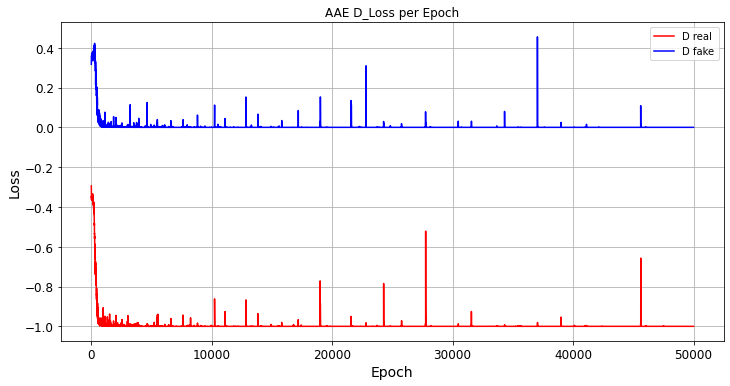

G_Loss: 


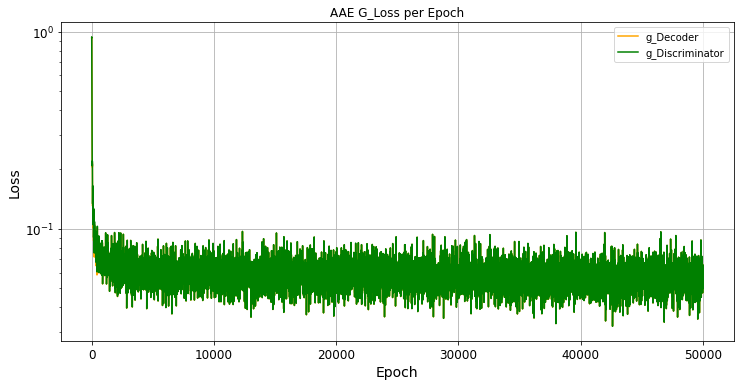

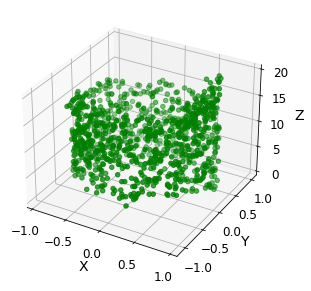

save countour point


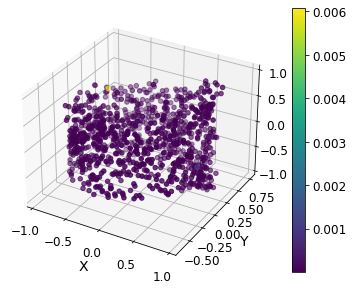

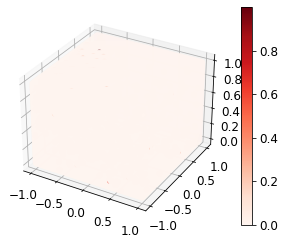

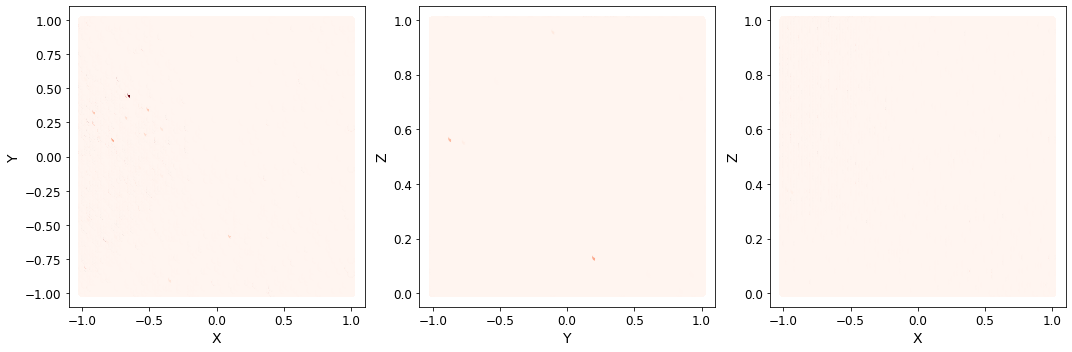

In [9]:
hist = aae.train(Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


D_Loss: 
G_Loss: 


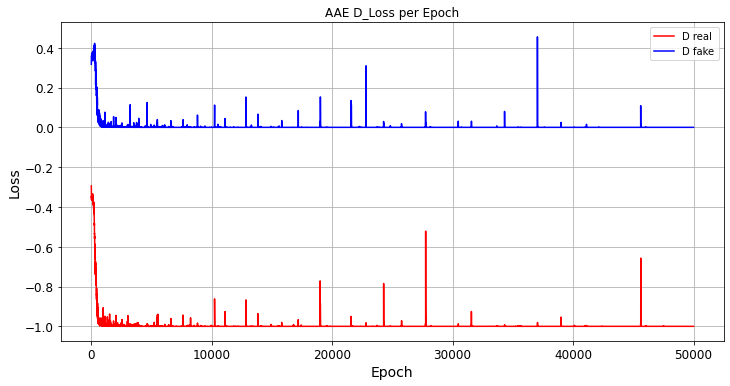

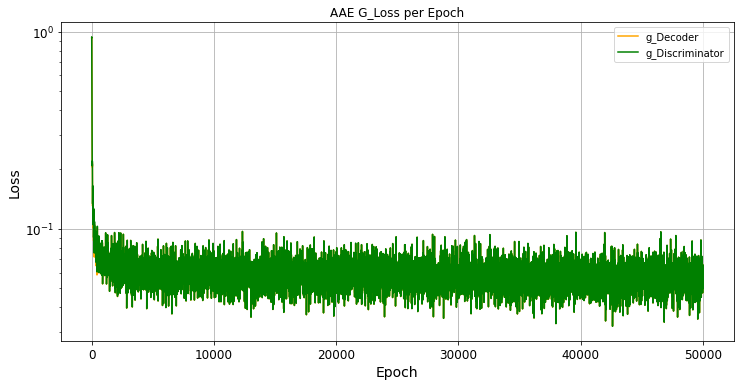

In [10]:
print('D_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.c1_hist, c='red')
ax.plot(aae.c2_hist, c='blue')

ax.legend(['D real', 'D fake'])
ax.grid()

plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE D_Loss per Epoch")
plt.savefig('AAE/Losses/AAE_dloss'+'.png')

print('G_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.g1_hist, c='orange')
ax.plot(aae.g2_hist, c='green')

ax.legend(['g_Decoder', 'g_Discriminator'])
ax.grid()

plt.tight_layout()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE G_Loss per Epoch")
plt.savefig('AAE/Losses/AAE_gloss'+'.png')


### predict from the decoder

Predicted Values: (1000, 3)
X-Y 2D slices:


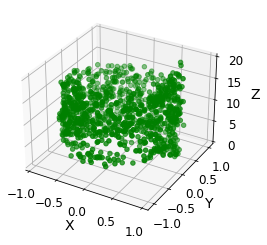

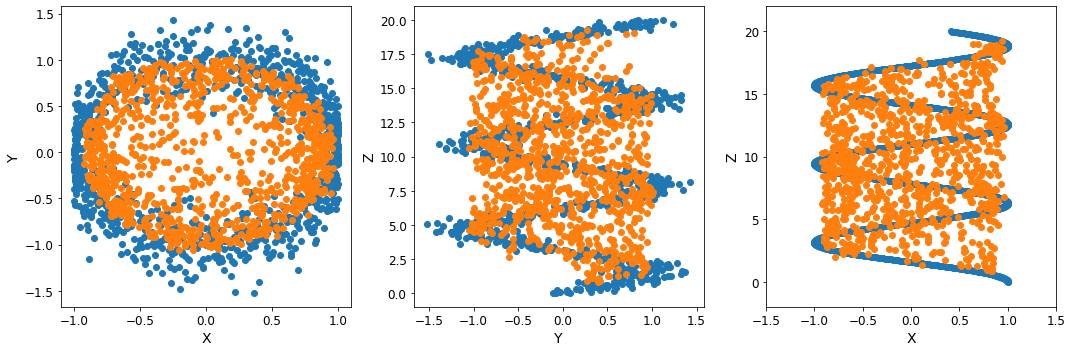

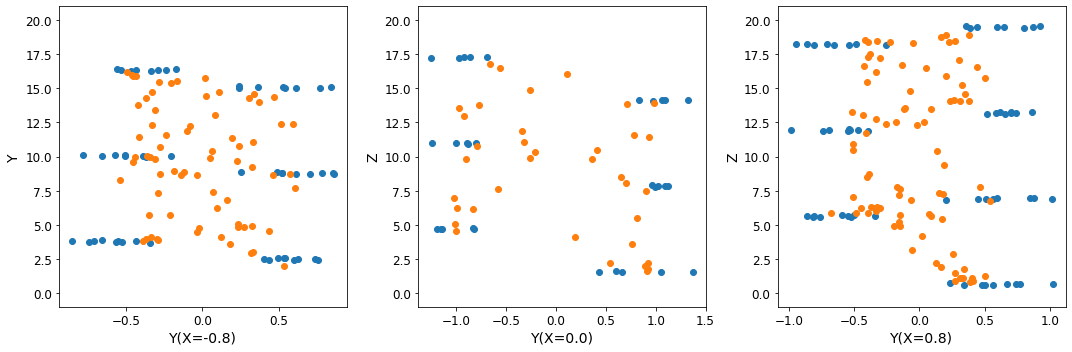

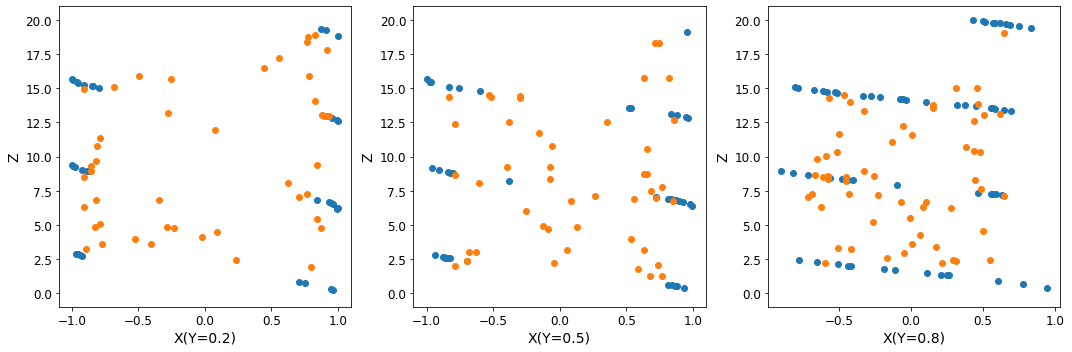

In [11]:
#predict the labels of the data values on the basis of the trained model.
#sampling from the latent space without prediction
#X, _ = make_swiss_roll(n_samples=int(self.batch_size*self.Z/3), noise=0.3)
#latent_values5 = X.reshape([1000,Z])
latent_values = tf.random.normal([1000, Z])
predicted_values = aae.decoder(latent_values)

predicted_values2 = aae.decoder(aae.encoder(X_train_scaled))
predicted_values3 = aae.encoder(X_train_scaled)
#predicted_values4 = scaler.inverse_transform(X_train_scaled)

if scaled == '-1-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    


if n_features==3:
    print("Predicted Values:",predicted_values.shape)    

    ab = plt.subplot(projection='3d')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2],c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    #ab = plt.subplot(projection='3d')
    #ab.scatter(latent_values5[:,0],latent_values5[:,1],latent_values5[:,2])
    #ab.set_ylabel('Y')
    #ab.set_zlabel('Z')
    #ab.set_xlabel('X')
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)

    axes[0].scatter(predicted_values3[:,0],predicted_values3[:,1],c='pink')#encoder(X_train_scaled)
    axes[0].scatter(latent_values[:,0],latent_values[:,1],c='grey')
    axes[0].set_ylabel('Y')
    axes[0].set_xlabel('X')

    
    
    axes[1].scatter(predicted_values2[:,0],predicted_values2[:,1],)#encoder/decoder
    #axes[1].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[1].set_ylabel('Y')
    axes[1].set_xlabel('X')

    
    axes[2].scatter(predicted_values[:,0],predicted_values[:,1],c='red') #decoder(latent space)
    #axes[2].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[2].set_ylabel('Y')
    axes[2].set_xlabel('X')
    
    plt.tight_layout()




save countour line


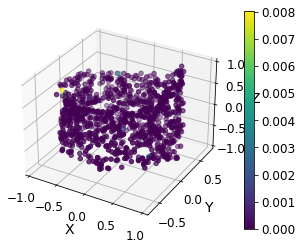

In [29]:
latent_values = tf.random.normal([1000, Z])

a = aae.decoder(latent_values)
bottleneck = aae.encoder(a)
     

disc_output = aae.discriminator(bottleneck)
#disc_output = disc_output.numpy().reshape(x_num,y_num).T

x = a[:,0]
y = a[:,1]
z = a[:,2]

colour = disc_output

        
ab = plt.subplot(projection='3d')
p = ab.scatter(x,y,z , c=colour)
ab.set_ylabel('Y')
ab.set_zlabel('Z')
ab.set_xlabel('X')
        
plt.colorbar(p)
#ab.tight_layout()

plt.savefig('AAE/Result/'+'helix_countour_points_v'+str(2)+'_epochs'+str(2000)+'.png')
print("save countour line")
plt.show()



### Applying the prediction function

input_test : (900, 3)


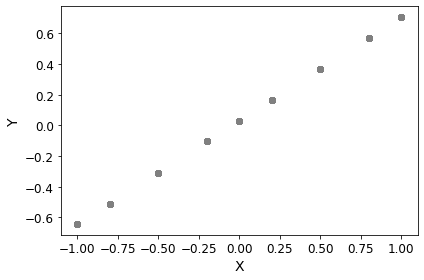

In [12]:
# define these for desired prediction
x_input = [-1.0,-0.8,-0.5,-0.2, 0, 0.2,0.5,0.8,1.0]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [13]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

X-Y 2D slices:


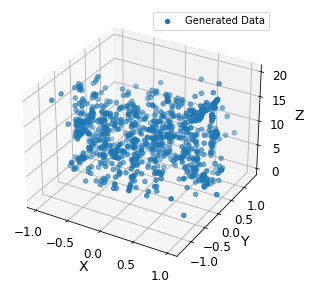

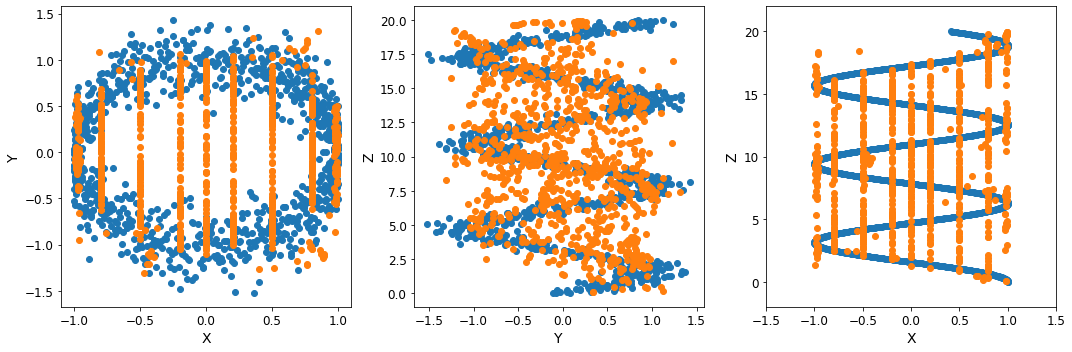

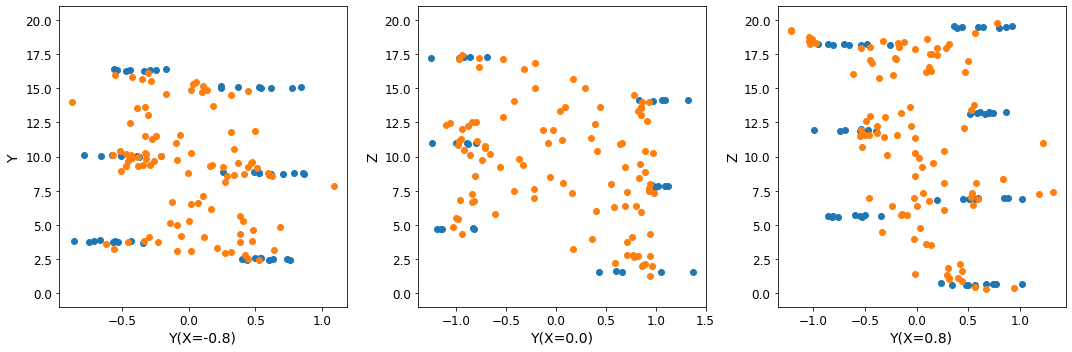

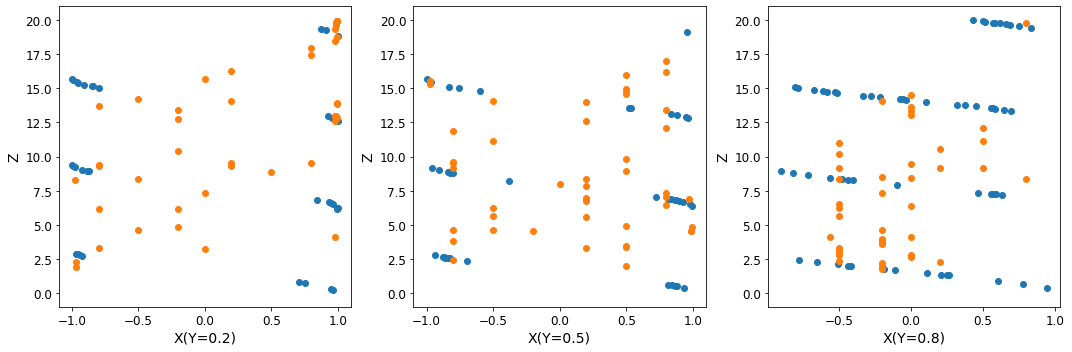

In [30]:
if scenario in ("3d", "helix"):

    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+'3D'+'_epochs'+str(epochs)+'.png')
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+'3Dslice1'+'_epochs'+str(epochs)+'.png')
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+'3Dslice2'+'_epochs'+str(epochs)+'.png')
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+'3Dslice3'+'_epochs'+str(epochs)+'.png')
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    